# Introduction to ML Project : Easy Visa

### Problem statement

## Description

### Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


### Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

### Data Dictionary

* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee have any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to othern workers offering the same or similar service in the same area of employment.
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* **case_status:** Flag indicating if the Visa was certified or denied

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier  # Decision tree for classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods for classification
from sklearn.model_selection import GridSearchCV # For cross-validation and hyperparameter tuning


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,f1_score
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\EasyVisa.csv")

In [3]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [5]:
data.shape

(25480, 12)

**Observations :**
There are 25480 rows and 12 columns in the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations :**
There are 9 object columns, 2 integer columns and 1 float and all the columns dont have any null values and there are no duplicates in the data which means all the values are unique

In [7]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations :**
As there are no null values in the data it's not necessary to handle them

In [8]:
data.duplicated().sum()

np.int64(0)

**Observations :**
As there are no duplicate values in the data across all the columns, so its not required to handle the duplicate values in the data.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations :**
1. There are 25480 employess and the mean count of employees is 5667
2. The mean prevailing_wage is 74455 and the minimum prevailing_wage is 2.13 and the maximum prevailing_wage is 319210

### Univariate Analysis

In [10]:
data['case_id'].nunique()

25480

**Observations :**
There are 25480 visa applications 

In [11]:
data['region_of_employment'].unique()

array(['West', 'Northeast', 'South', 'Midwest', 'Island'], dtype=object)

**Observations :**
The visa applications are from different regions like west, northeast, south, midwest and island

In [12]:
data['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

**Observations :**
There are visa applications from different continents such as asia, africa, north america, europe and south america

In [13]:
data['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Observations :**
In 25480 applications 17018 applications got approved and 8462 applications got rejected

In [14]:
data['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

**Observations :**
Most of the people get paid once a year (22,962 times). The next most common way paid is based on the hour (2,157 times).  Paying people every week or every month is less .

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

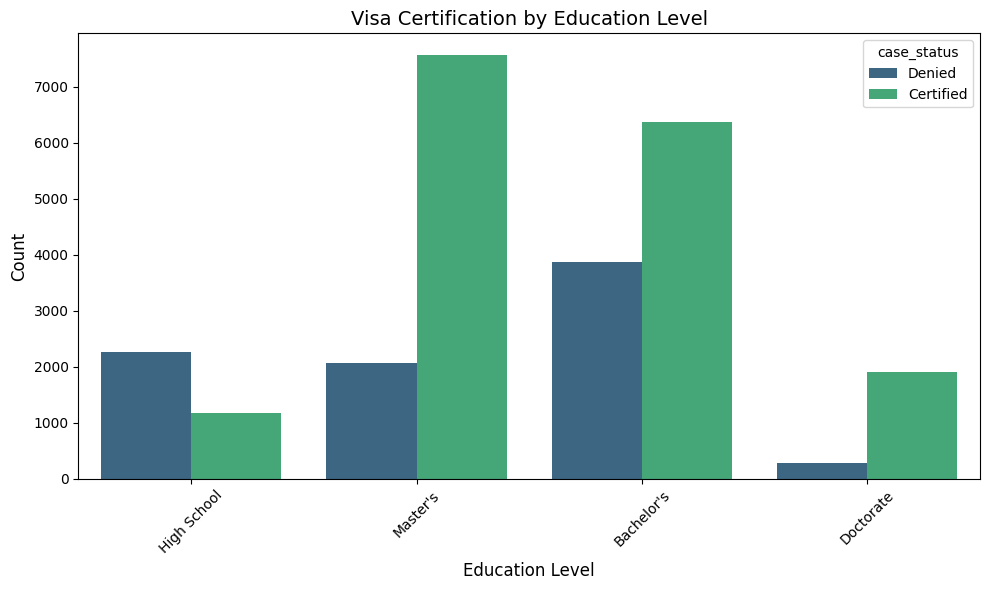

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education_of_employee', hue='case_status', palette="viridis")
plt.title("Visa Certification by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations :**
1. Most of the applications certified are from the masters students and followed by Bachelors and Doctorate.
2. Most of the applications denied are from Bachelors and followed by high school and masters
3. The least applications approved are from High school and the least applications denied are from Doctorate.

**2. How does the visa status vary across different continents?**

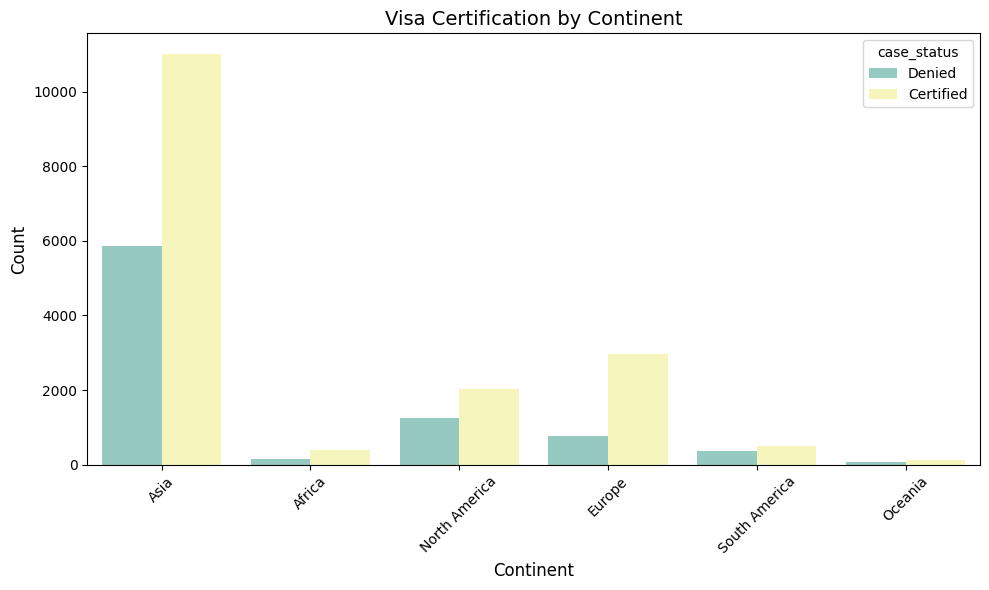

In [16]:
# Plot: Continent vs Case Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='continent', hue='case_status', palette="Set3")
plt.title("Visa Certification by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations :**
1. Most of the visa applications are got certified from the asia continent and followed by Europe and northamerica.
2. Most of the visa applications got denied are from the Asia continent followed by northamerica and europe
3. The least visa applications certified are from Oceania and least denied are from ocenia.

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

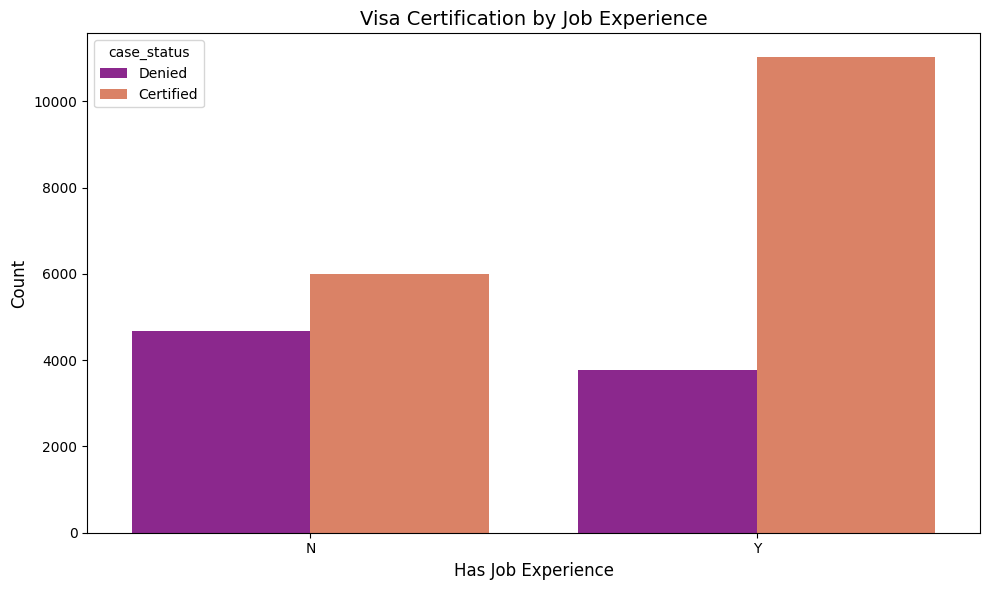

In [17]:
# Plot: Job Experience vs Case Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='has_job_experience', hue='case_status', palette="plasma")
plt.title("Visa Certification by Job Experience", fontsize=14)
plt.xlabel("Has Job Experience", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
1. Most of the people who are having experience are certified than people with no experience
2. The people who dont have experience got denied more than the people with experience

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

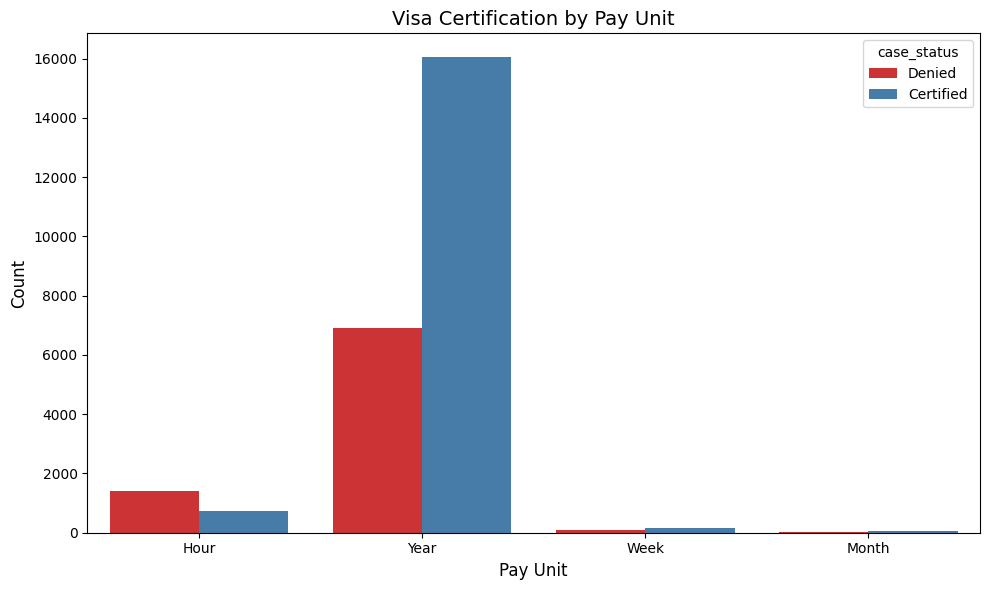

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unit_of_wage', hue='case_status', palette="Set1")
plt.title("Visa Certification by Pay Unit", fontsize=14)
plt.xlabel("Pay Unit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
Most people apply for visas when they get paid yearly, and this also has the most denied applications.  Fewer people apply when they get paid hourly, and followed by when they get paid weekly or monthly.  

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

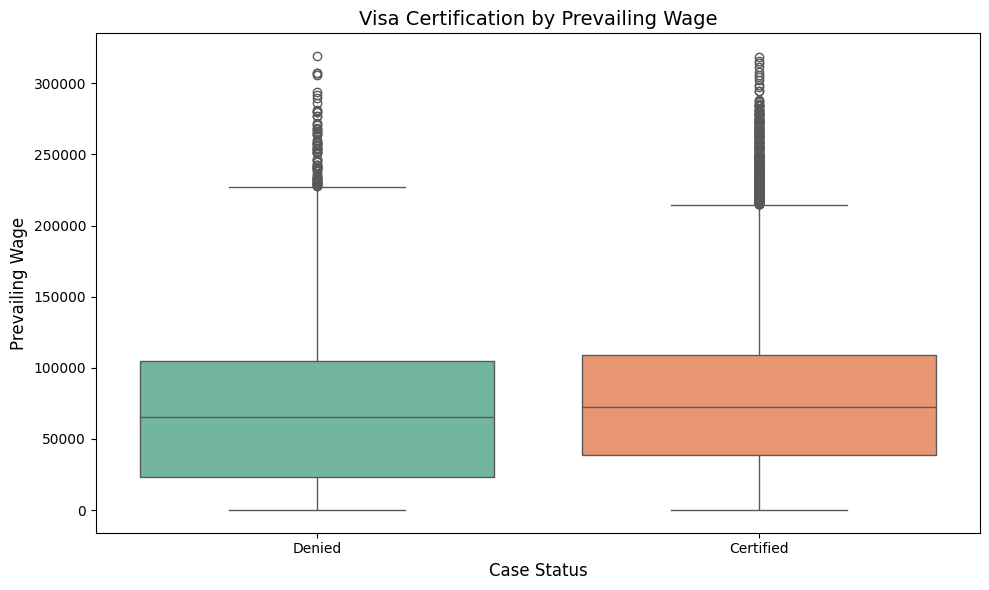

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='case_status', y='prevailing_wage', palette="Set2")
plt.title("Visa Certification by Prevailing Wage", fontsize=14)
plt.xlabel("Case Status", fontsize=12)
plt.ylabel("Prevailing Wage", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
The median prevailing wage is higher for certified applications than the denied applications. Both categories have outliers, which indicates that there are applications with extremely high prevailing wages.

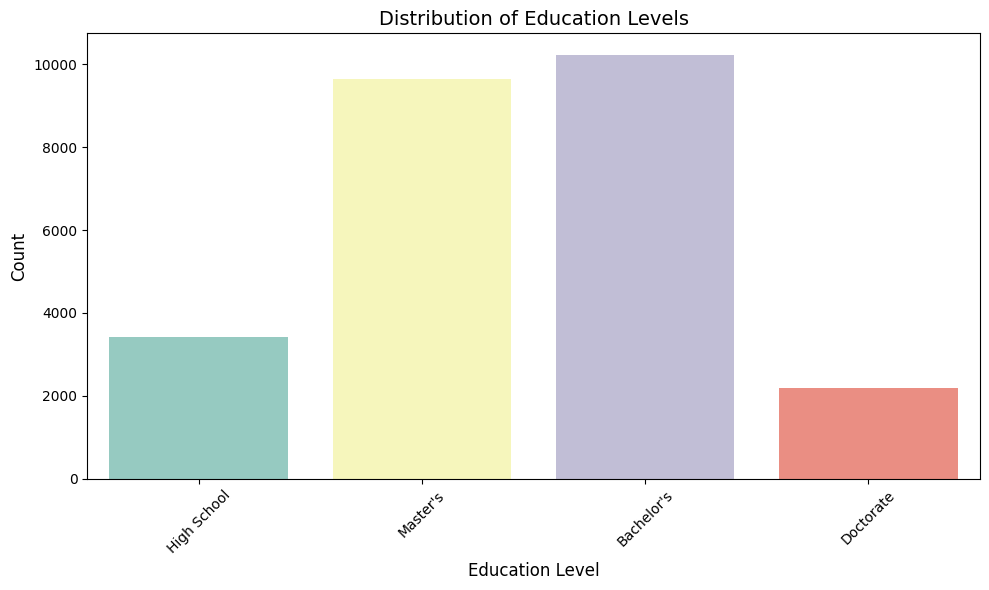

In [20]:
# Plot: Distribution of Education
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education_of_employee', palette="Set3")
plt.title("Distribution of Education Levels", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations :**
The most common education who are applying for visa is having bachelors degree followed by masters degree and least people having doctorate degree

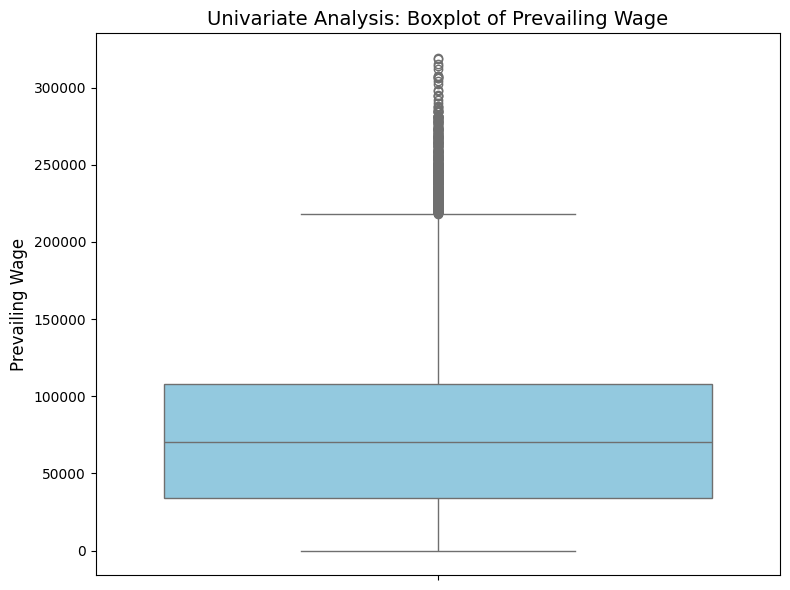

In [21]:
# Univariate Boxplot: Prevailing Wage
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='prevailing_wage', color='skyblue')
plt.title("Univariate Analysis: Boxplot of Prevailing Wage", fontsize=14)
plt.ylabel("Prevailing Wage", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
The median prevailing wage is in between 700000 to 80000 and the 25% of the people having less than 500000 prevailing wage and the maximium prevailiage is 110000


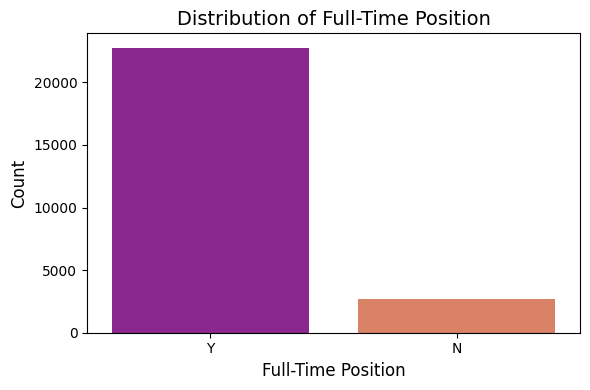

In [22]:
# Plot: Distribution of Full-Time Position
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='full_time_position', palette="plasma")
plt.title("Distribution of Full-Time Position", fontsize=14)
plt.xlabel("Full-Time Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
More than 20,000 people who are applying for visa has full time position and only less people has full time position

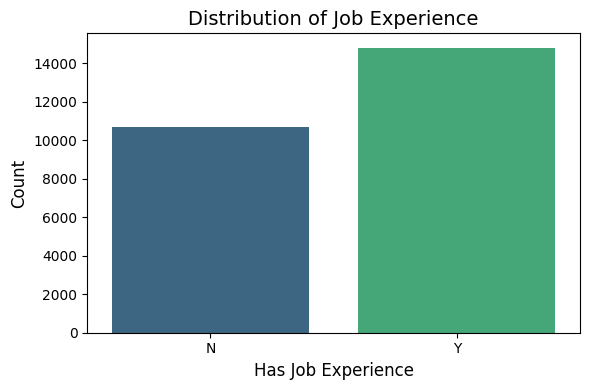

In [23]:
# Plot: Distribution of Job Experience
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='has_job_experience', palette="viridis")
plt.title("Distribution of Job Experience", fontsize=14)
plt.xlabel("Has Job Experience", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
More than 14000 people having experience who are applying for visa and 10000 people having no experience

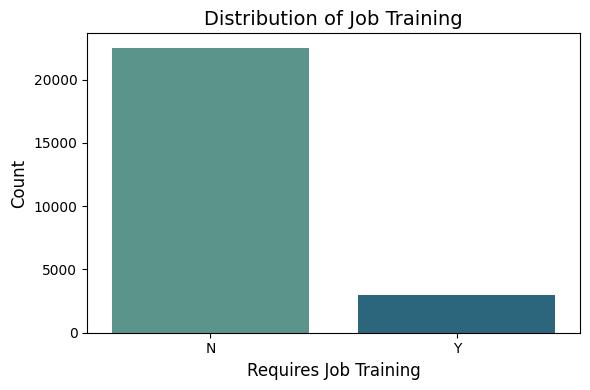

In [24]:
# Plot: Distribution of Job Training
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='requires_job_training', palette="crest")
plt.title("Distribution of Job Training", fontsize=14)
plt.xlabel("Requires Job Training", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
In 25481 visa applications more than 20000 people requires job training and less than 5000 people requires no training

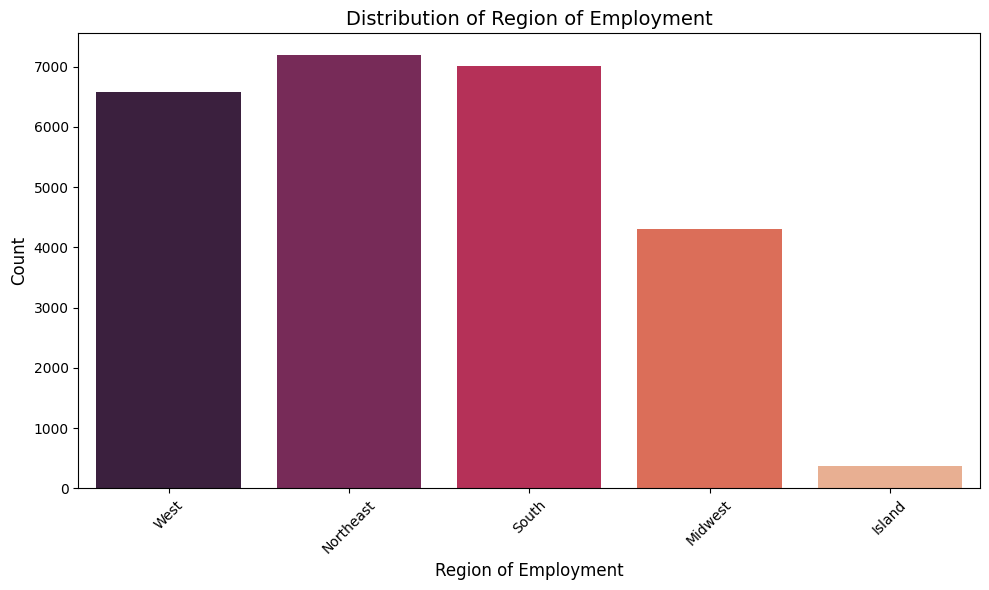

In [25]:
# Plot: Distribution of Region of Employment
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='region_of_employment', palette="rocket")
plt.title("Distribution of Region of Employment", fontsize=14)
plt.xlabel("Region of Employment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations :**
Most of the people who are applying for visas are from northeast followed by south and less people who are applying are from island region

### Bivariate Analysis

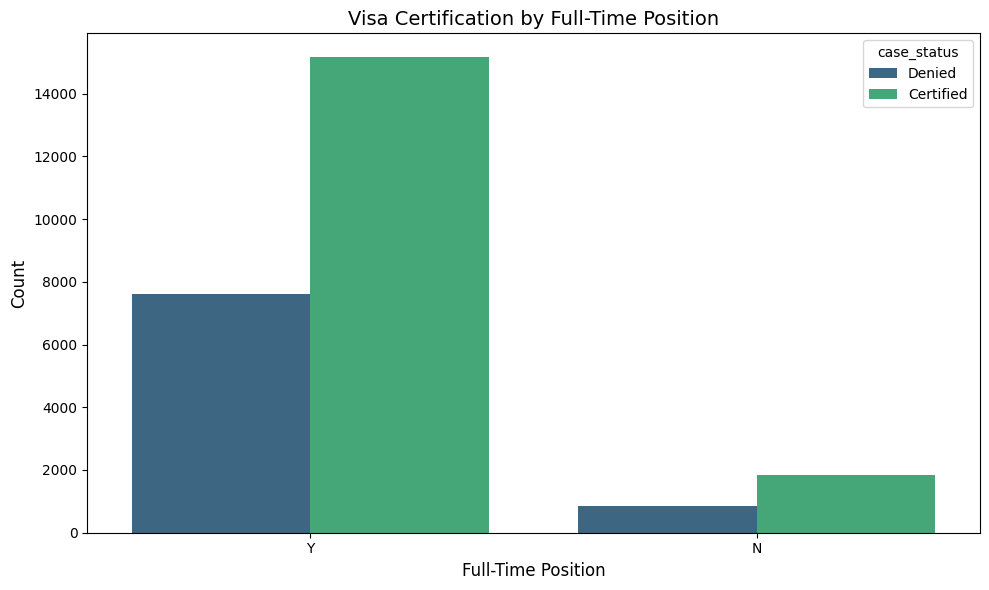

In [26]:
# Plot: Full-Time Position vs Case Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='full_time_position', hue='case_status', palette="viridis")
plt.title("Visa Certification by Full-Time Position", fontsize=14)
plt.xlabel("Full-Time Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
Most of the visas certified are from the people who is having full time position than the no full time and also more denied applications are from the people having full time position than the no full time

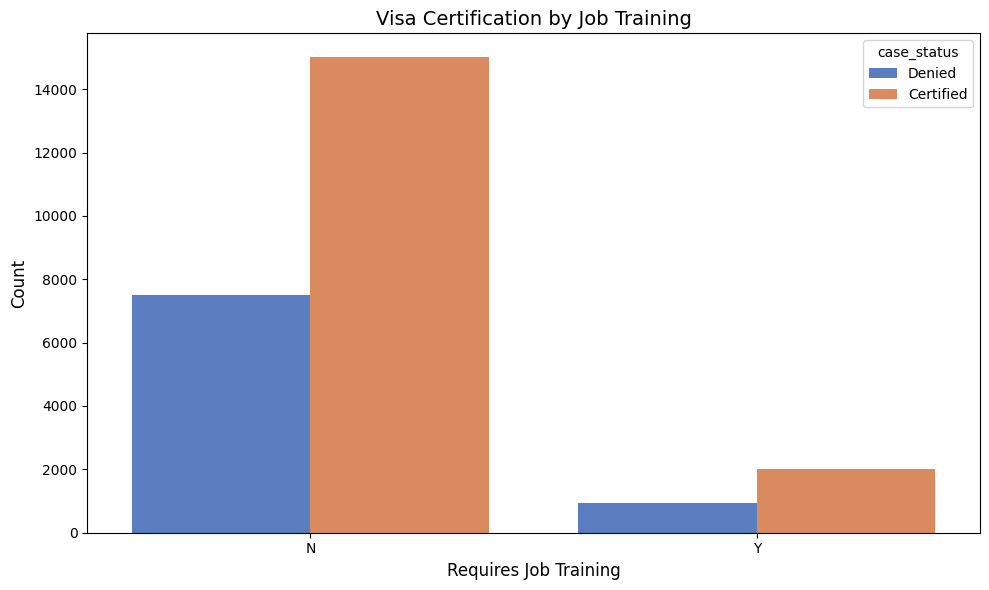

In [27]:
#  Requires Job Training vs Case Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='requires_job_training', hue='case_status', palette="muted")
plt.title("Visa Certification by Job Training", fontsize=14)
plt.xlabel("Requires Job Training", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
The higher number of visas are certified for people who do not require job training compared to those that requires training. and there are also more denied applications for people that do not require job training.

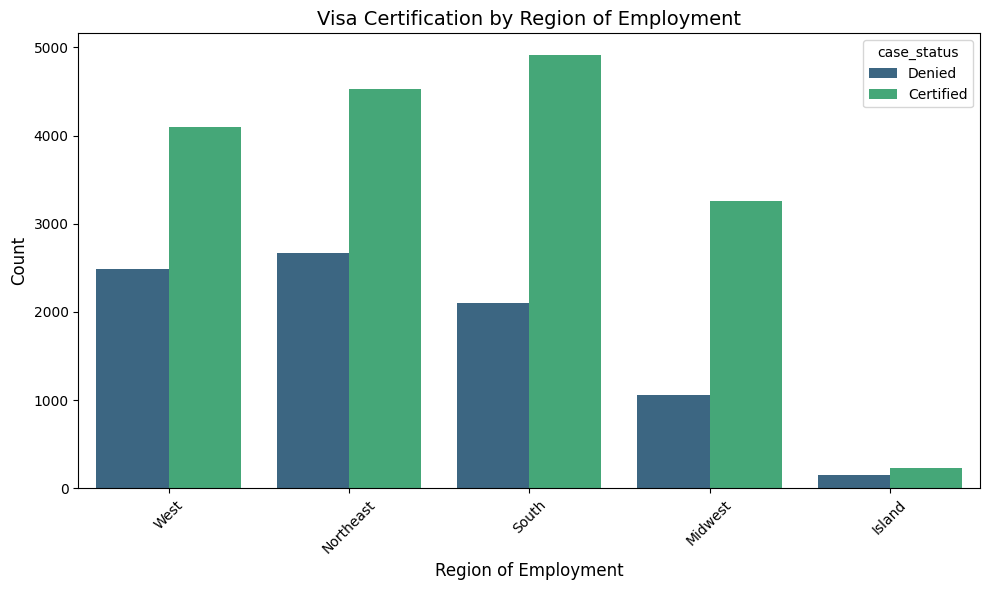

In [28]:
# Plot: Region of Employment vs Case Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='region_of_employment', hue='case_status', palette="viridis")
plt.title("Visa Certification by Region of Employment", fontsize=14)
plt.xlabel("Region of Employment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations :**
The South region has the highest number of both certified and denied visa applications and followed by Northeast and West regions. The Midwest and Island regions have less applications, with the Island region having the lowest number of both certifications and denials.

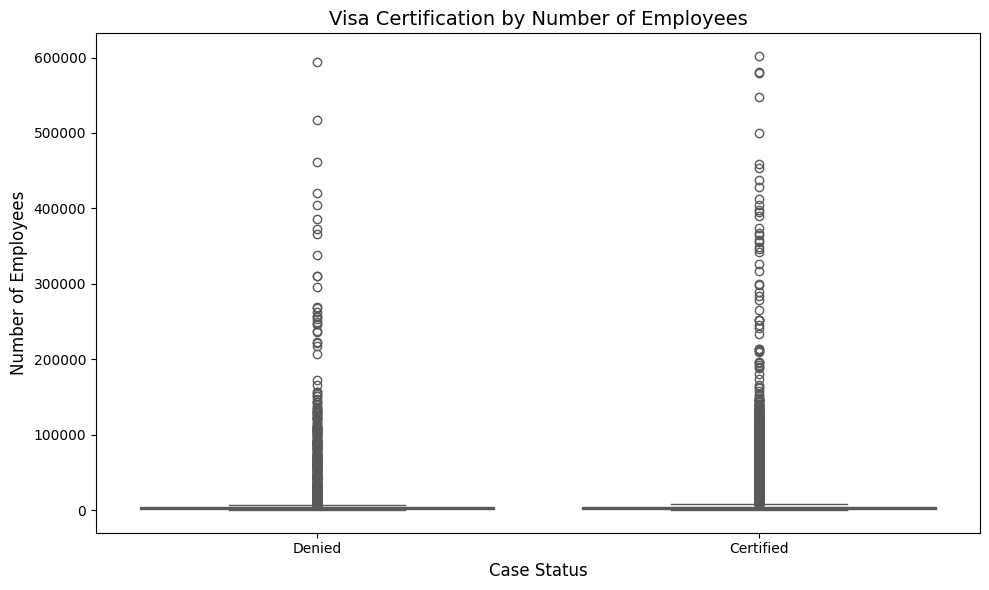

In [29]:
# Plot: No of Employees vs Case Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='case_status', y='no_of_employees', palette="Set2")
plt.title("Visa Certification by Number of Employees", fontsize=14)
plt.xlabel("Case Status", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
The majority of visas got certified and denied are associated with companies having a smaller number of employees. There are some outliers with a very high number of employees, but these are less frequent.

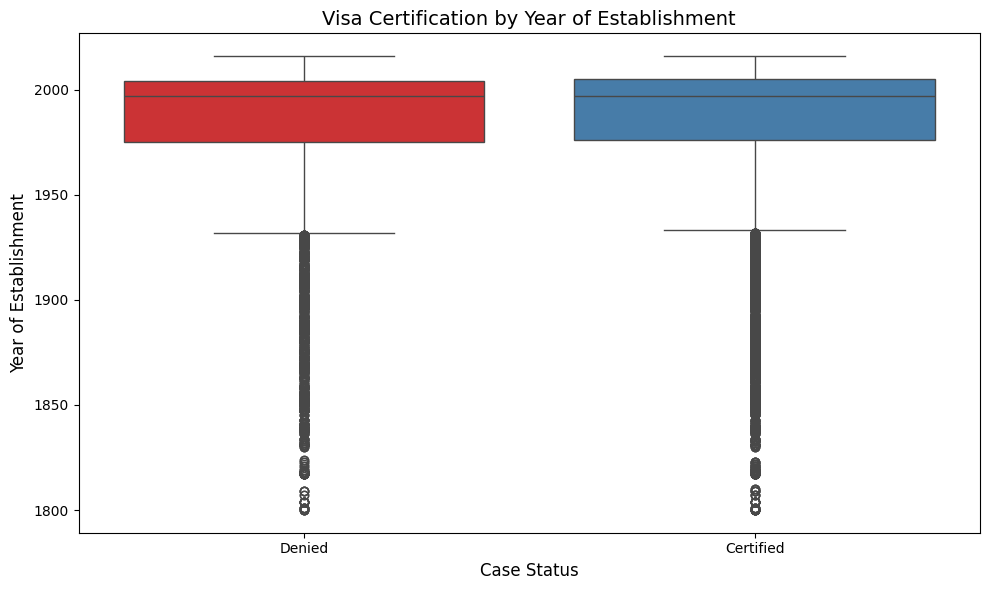

In [30]:
# Plot: Year of Establishment vs Case Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='case_status', y='yr_of_estab', palette="Set1")
plt.title("Visa Certification by Year of Establishment", fontsize=14)
plt.xlabel("Case Status", fontsize=12)
plt.ylabel("Year of Establishment", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
The majority of visas got certified and denied, are associated with companies established in recent years.75% of the companies are established after 1950 and 25% of the companies are established after the year 2000

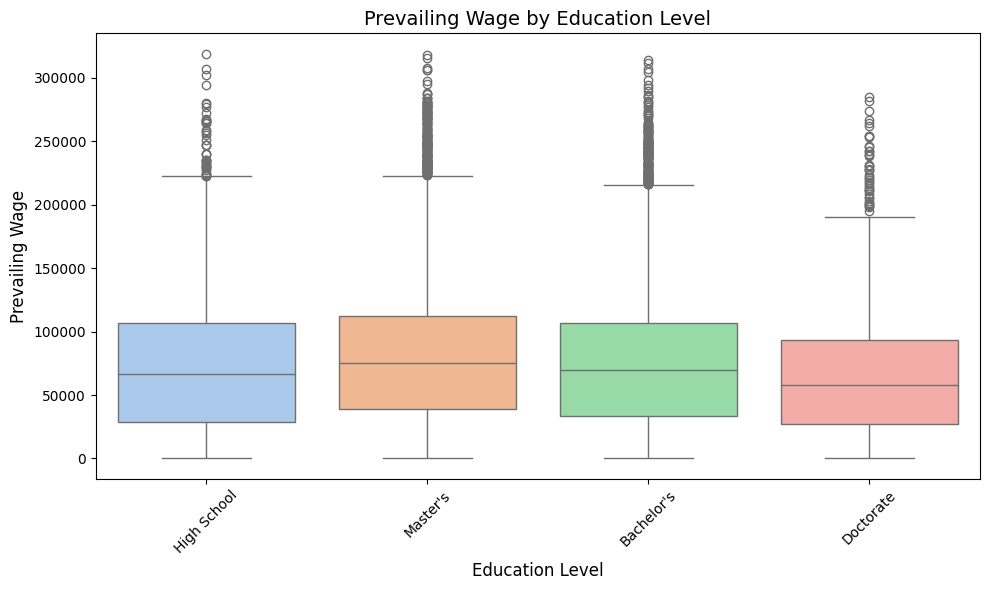

In [31]:
# Plot: Education vs Prevailing Wage
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education_of_employee', y='prevailing_wage', palette="pastel")
plt.title("Prevailing Wage by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Prevailing Wage", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations :**
The people with Master's degree is having highest prevailing wages, followed by those with Bachelor's degrees compared to high school degree and doctorate degree and the median salary of master's degree is more than the other degrees. There are outliers in all categories, which indicates that the presence of some individuals with significantly higher prevailing wages.

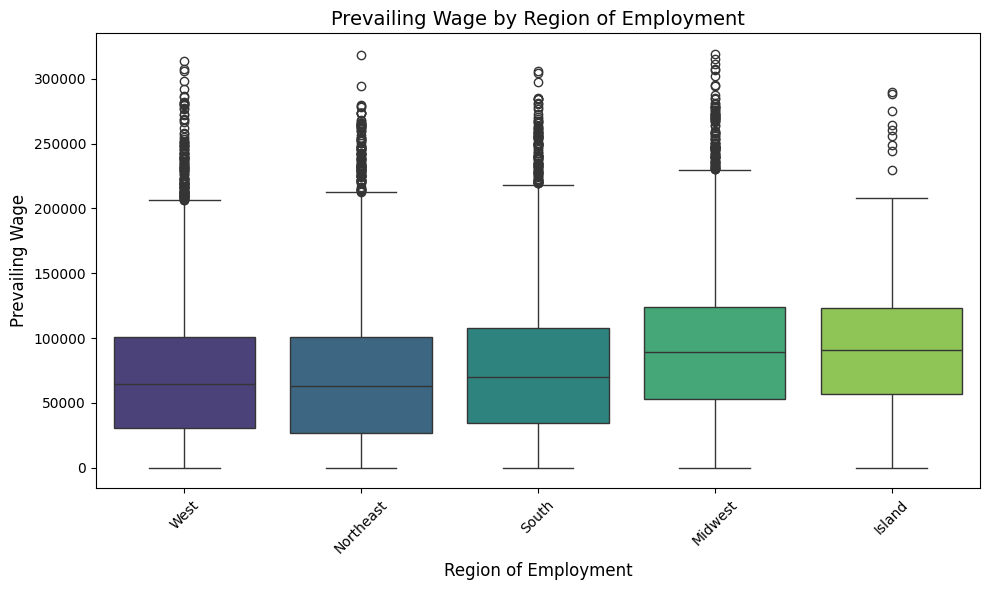

In [32]:
# Plot: Region of Employment vs Prevailing Wage
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage', palette="viridis")
plt.title("Prevailing Wage by Region of Employment", fontsize=14)
plt.xlabel("Region of Employment", fontsize=12)
plt.ylabel("Prevailing Wage", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations :**
The South and Midwest regions have higher prevailing wages compared to the West, Northeast, and Island regions. There are outliers in all categories, which indicates the presence of some individuals with significantly higher prevailing wages. The people from the island and the midwest having the highest and similar median wage compared to other regions and northeast people having less median wage compared to other regions.

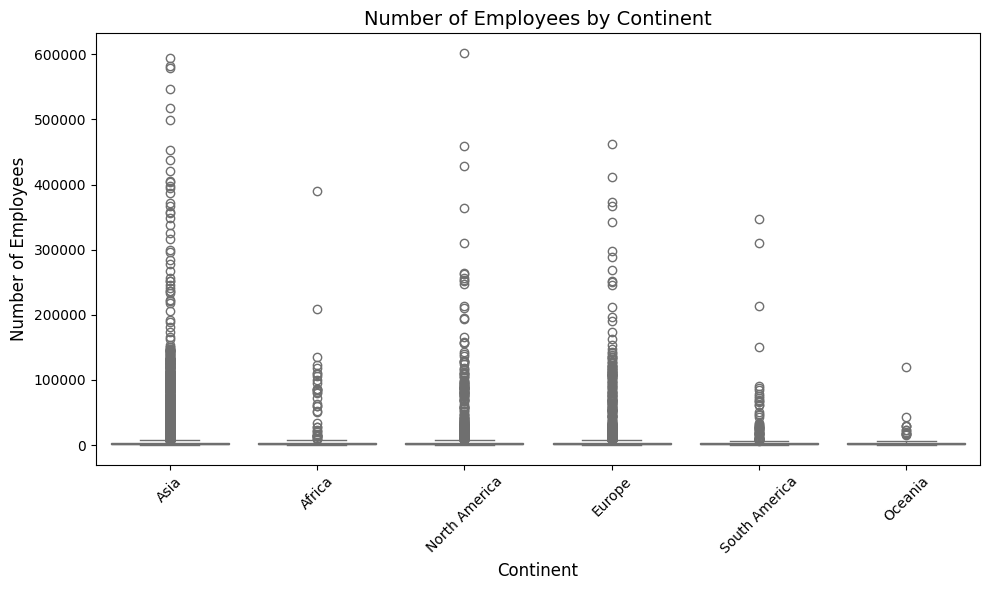

In [33]:
# Plot: Continent vs Number of Employees
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='continent', y='no_of_employees', palette="pastel")
plt.title("Number of Employees by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations :**
Asia shows a significantly larger number of employees compared to other continents.  Europe has the second-largest number of employees, followed by North America. Africa, South America, and Oceania have very fewer employees. There are outliers in all categories which indicates that the presence of some companies with a significantly larger number of employees


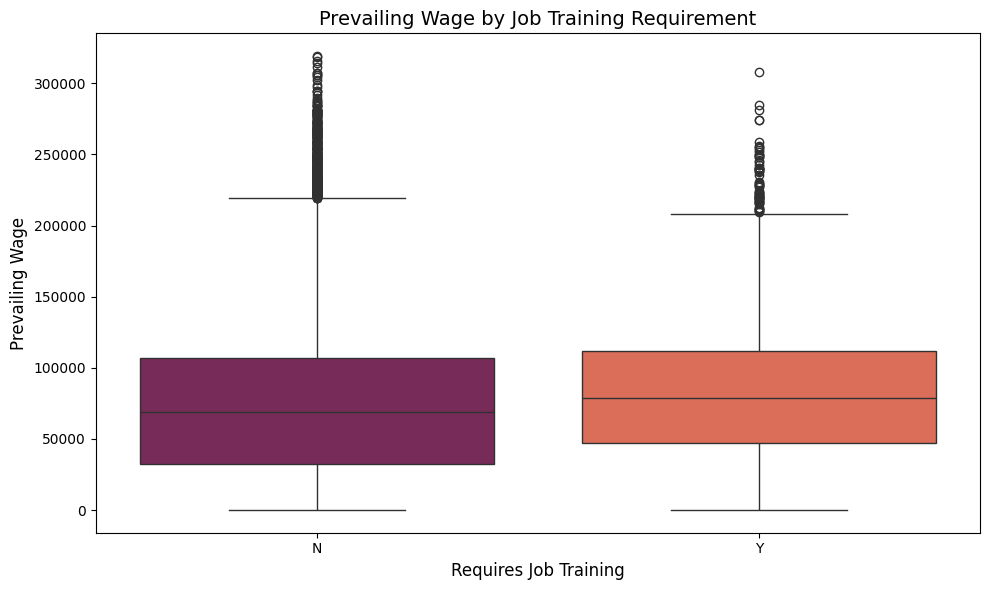

In [34]:
# Plot: Requires Job Training vs Prevailing Wage
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='requires_job_training', y='prevailing_wage', palette="rocket")
plt.title("Prevailing Wage by Job Training Requirement", fontsize=14)
plt.xlabel("Requires Job Training", fontsize=12)
plt.ylabel("Prevailing Wage", fontsize=12)
plt.tight_layout()
plt.show()


**Observations :**
Positions that do not require job training is having lower prevailing wages compared to requiring job training. There are outliers in both categories which indicates the presence of some positions with significantly higher prevailing wages regardless of the job training requirement.

In [35]:
# Average prevailing wage grouped by education level (rounded to 2 decimals)
avg_wage_by_education = data.groupby('education_of_employee')['prevailing_wage'].mean().round(2)
print("Average Prevailing Wage by Education Level:\n", avg_wage_by_education)


Average Prevailing Wage by Education Level:
 education_of_employee
Bachelor's     73405.44
Doctorate      64561.08
High School    71582.15
Master's       78843.06
Name: prevailing_wage, dtype: float64


**Observations :**
The highest average prevailing wage is for employees with master's degree followed by bachelors and High school and the lowest average prevailing wage is for the employees with doctorate degree.


In [36]:
# Total number of employees grouped by region of employment
total_employees_by_region = data.groupby('region_of_employment')['no_of_employees'].sum()
print("Total Number of Employees by Region:\n", total_employees_by_region)


Total Number of Employees by Region:
 region_of_employment
Island        2656918
Midwest      19089177
Northeast    42811608
South        42033718
West         37804840
Name: no_of_employees, dtype: int64


**Observations :**
The Northeast and South regions have the highest number of employees, followed by the West, Midwest. The Island region has the lowest number of employees.

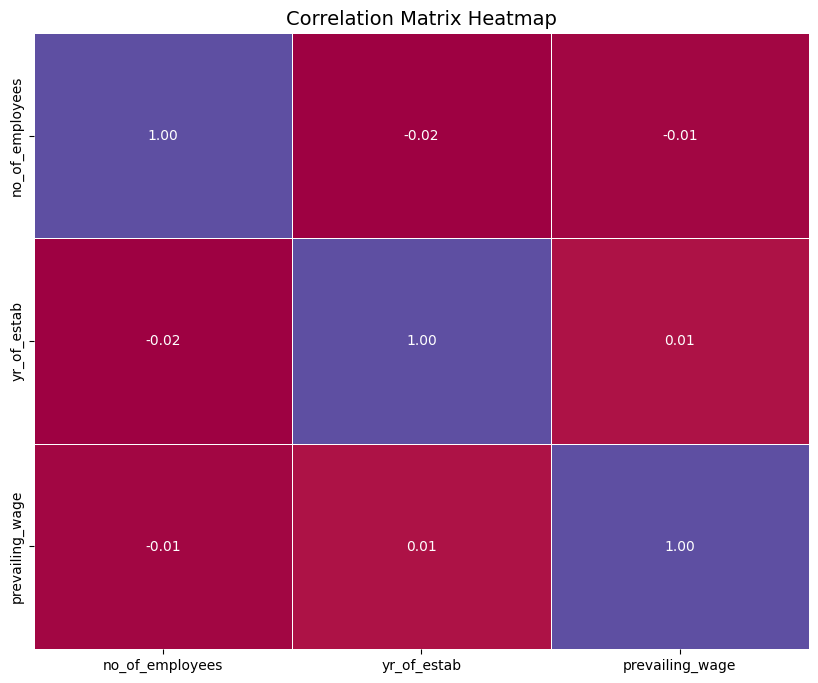

In [37]:
# Calculate correlation matrix
correlation_matrix = data.corr(numeric_only=True)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral",fmt='.2f', linewidths=0.5,cbar=False)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()


**Observations :**
There are no strong positive correlations between the variables "no_of_employees", "yr_of_estab", and "prevailing_wage". The correlation coefficients are very close to zero which indicates a weak or negligible relationship between the variables.


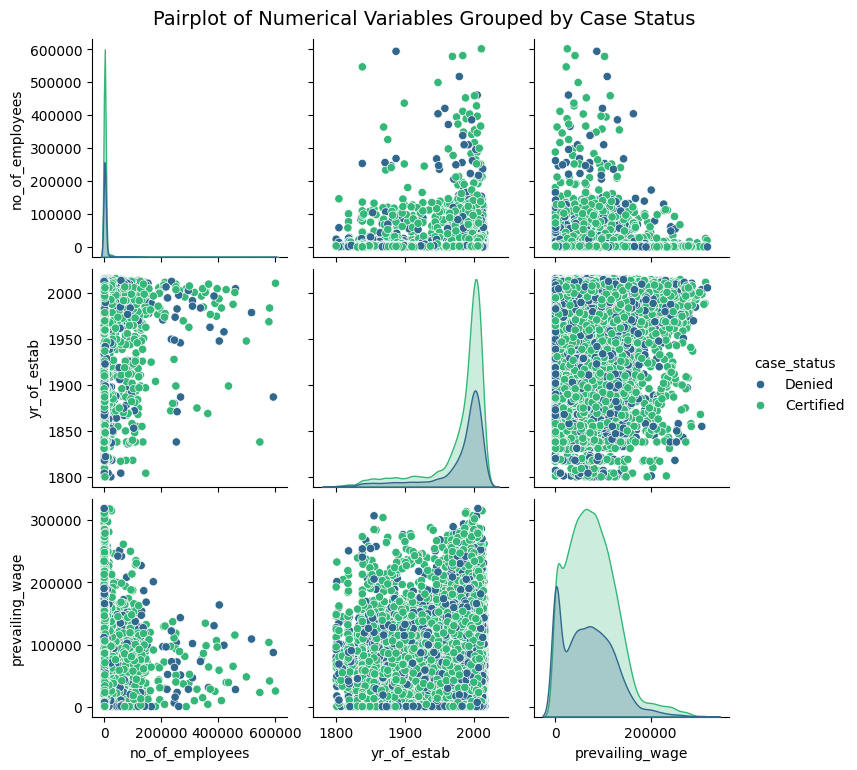

In [38]:
# Pairplot for numerical columns with case status as hue
sns.pairplot(data, hue='case_status', diag_kind='kde', palette="viridis")
plt.suptitle("Pairplot of Numerical Variables Grouped by Case Status", y=1.02, fontsize=14)
plt.show()


**Observations :**
1. "no_of_employees" exhibits a right-skewed distribution, indicating that a majority of companies have a smaller number of employees.
2. "yr_of_estab" shows a concentration of companies established in recent years.
3. "prevailing_wage" also displays a right-skewed distribution, suggesting a larger number of lower-paying jobs.

## Data Preprocessing

### Outlier Check


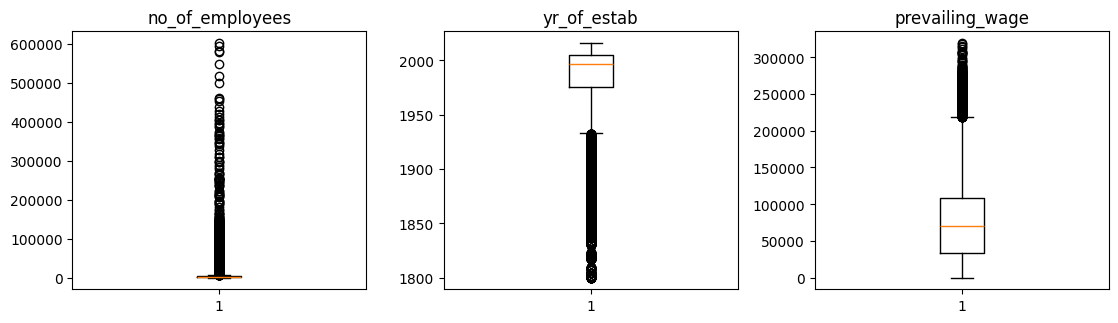

In [39]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for Modelling

In [40]:
#replacing denied with 1 and certified with 0
data['case_status'] = data['case_status'].replace({'Denied': 1, 'Certified': 0})


In [41]:
# defining the independent and dependent variables
data.drop("case_id",axis=1,inplace=True)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [42]:
# Normalizing the numerical variables
num_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler
X[num_columns] = scaler.transform(X[num_columns])

In [43]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,0.386667,0.651230,-1.398537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.142282,0.533211,0.169835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.694984,0.674834,0.919079,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-0.243429,-1.945186,0.169994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,-0.200417,0.604022,1.428604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [44]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [45]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (20384, 21)
Shape of test set: (5096, 21) 

Percentage of classes in training set:
case_status
0    66.787677
1    33.212323
Name: proportion, dtype: float64 

Percentage of classes in test set:
case_status
0    66.797488
1    33.202512
Name: proportion, dtype: float64


**Observations :**
1. The training set has 20384 rows of data and 21 columns
2. The testing set has 5096 rows of data and 21 columns

In [46]:
def evaluate_model(target, pred, model):
    # Calculate each metric
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  # Recall
    precision = precision_score(target, pred)  # Precision
    f1 = f1_score(target, pred)  # F1-score
    
    # Creating a DataFrame to display the metrics
    df_perf = pd.DataFrame(
        {"Accuracy": [acc], "Recall": [recall], "Precision": [precision], "F1": [f1]},
        index=["Metrics"]
    )
    
    # Generate and display confusion matrix
    cm = confusion_matrix(target, pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_display.plot(cmap='Blues')
    
    return df_perf

### Decision tree(Default)

In [47]:
model0=DecisionTreeClassifier(random_state=42)

,Accuracy,Recall,Precision,F1
Metrics,1.0,1.0,1.0,1.0


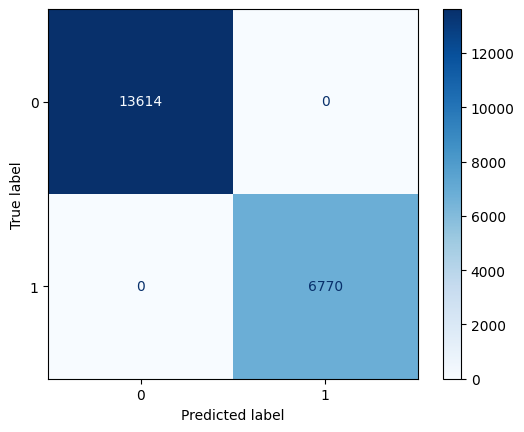

In [48]:
model0.fit(X_train,y_train)
x_predict=model0.predict(X_train)
DT_default_train_perf=evaluate_model(y_train, x_predict,model0)
DT_default_train_perf

,Accuracy,Recall,Precision,F1
Metrics,1.0,1.0,1.0,1.0


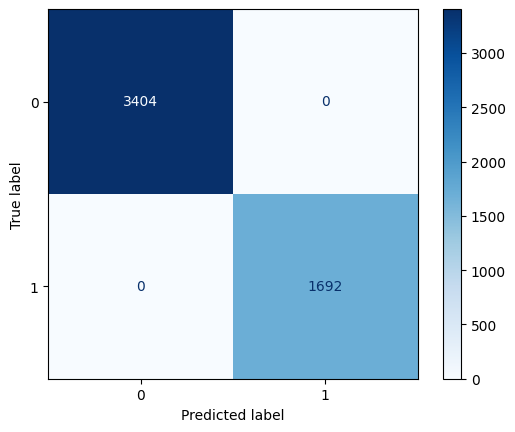

In [49]:
model0.fit(X_test,y_test)
x_predict=model0.predict(X_test)
DT_default_test_perf=evaluate_model(y_test, x_predict,model0)
DT_default_test_perf

**Observations :** Here the data looks like slightly imbalanced so here we focus more on capturing the true positives, and also  The decision tree with default is overfitting to the training data.


### Decision tree(with class_weights)

In [50]:
model1 = DecisionTreeClassifier(random_state=42, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

,Accuracy,Recall,Precision,F1
Metrics,1.0,1.0,1.0,1.0


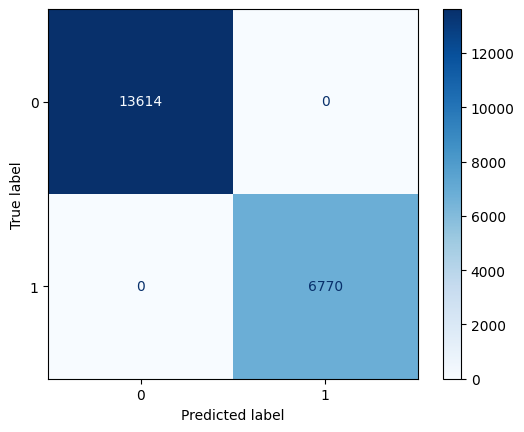

In [51]:
x_predict=model1.predict(X_train)
DT_class_train_perf=evaluate_model(y_train, x_predict,model1)
DT_class_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.649922,0.464539,0.472356,0.468415


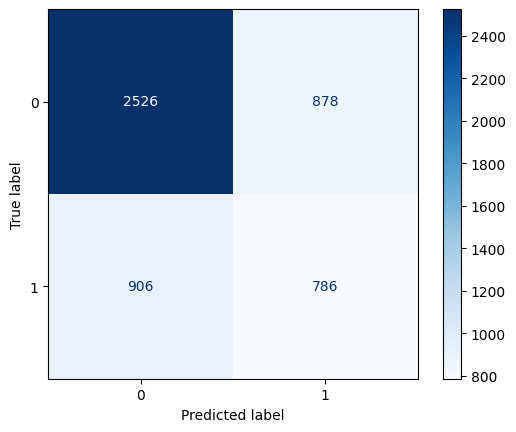

In [52]:
x_predict=model1.predict(X_test)
DT_class_test_perf=evaluate_model(y_test, x_predict,model1)
DT_class_test_perf

**Observations :** As the recall accuracy and other metrics are not good compared to the training data and decision tree with default, so The decision tree with class_weights is not performring well to training data and the model is over fitting

### Decision tree(Pre-Pruning)

In [53]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.7127659574468085


In [54]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

,Accuracy,Recall,Precision,F1
Metrics,0.638049,0.706056,0.470102,0.564411


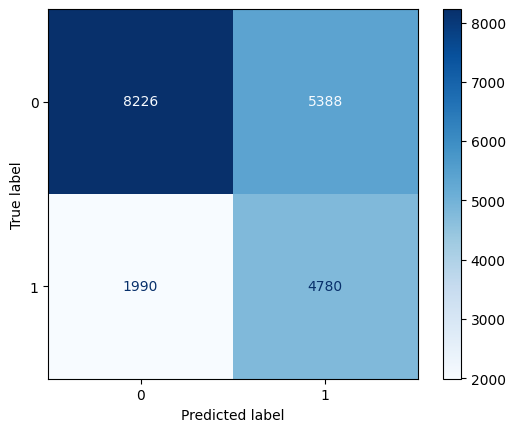

In [55]:
x_predict=model2.predict(X_train)
DT_Pre_train_perf=evaluate_model(y_train, x_predict,model2)
DT_Pre_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.644035,0.712766,0.475927,0.570752


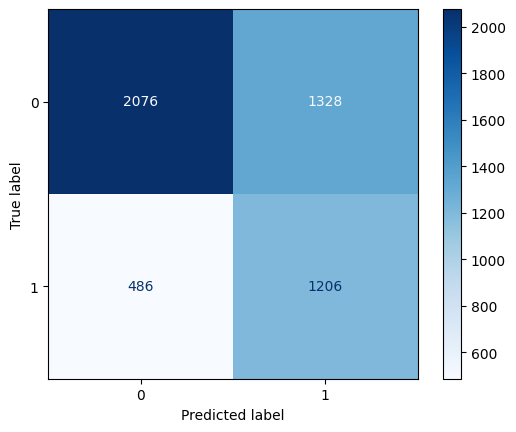

In [105]:
x_predict=model2.predict(X_test)
DT_Pre_test_perf=evaluate_model(y_test, x_predict,model2)
DT_Pre_test_perf

**Observations :** Here the model performance is more for testing data than the training data hence the model is overfitting

### Decision Tree(Post Pruning)

In [57]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [58]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.930143e-16
1,4.077505e-20,-1.929735e-16
2,4.077505e-20,-1.929327e-16
3,4.077505e-20,-1.928919e-16
4,4.077505e-20,-1.928512e-16
...,...,...
2546,6.665910e-03,4.210666e-01
2547,8.610298e-03,4.296769e-01
2548,9.332774e-03,4.390097e-01
2549,2.438294e-02,4.633926e-01


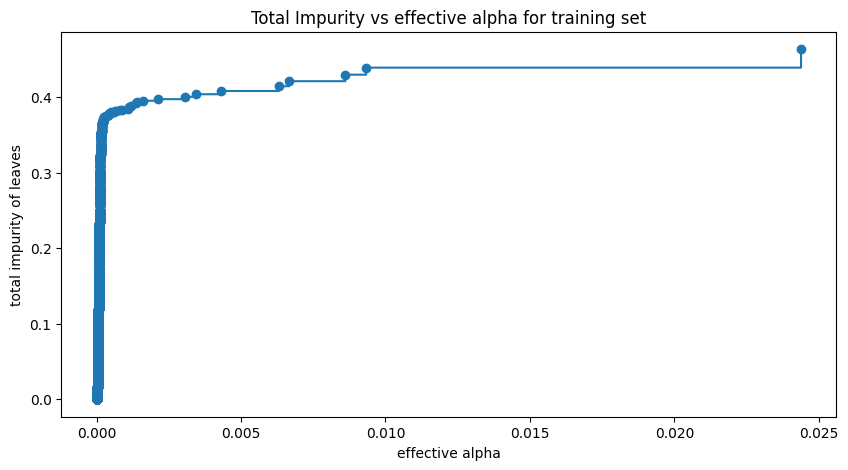

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

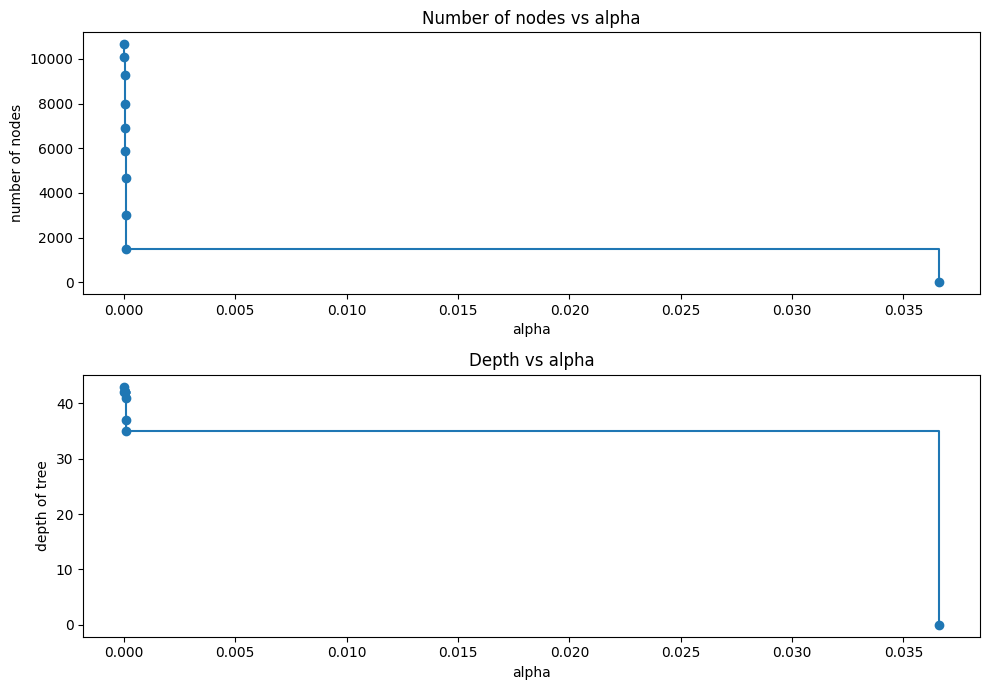

In [60]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

sample_indices = np.linspace(0, len(ccp_alphas) - 1, num=10, dtype=int)
ccp_alphas_sampled = ccp_alphas[sample_indices]

clfs = []
for ccp_alpha in ccp_alphas_sampled:
    clf = DecisionTreeClassifier(random_state=1, class_weight="balanced", ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas_sampled, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas_sampled, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()
plt.show()


In [61]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
    


In [62]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [63]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [64]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0366073559074272),
                       class_weight='balanced', random_state=1)


In [65]:
model3 = best_model

,Accuracy,Recall,Precision,F1
Metrics,0.332123,1.0,0.332123,0.498637


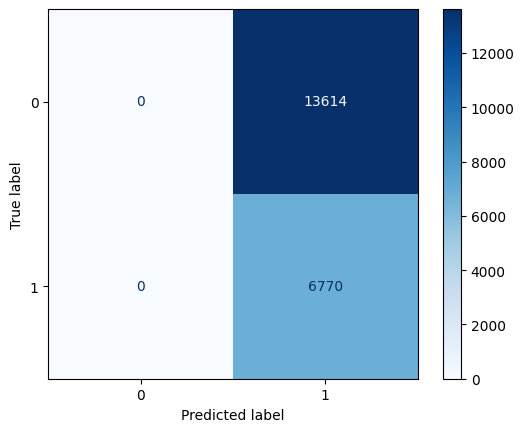

In [66]:
x_predict=model3.predict(X_train)
decision_tree_post_perf_train = evaluate_model(y_train, x_predict,model3)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
Metrics,0.332025,1.0,0.332025,0.498527


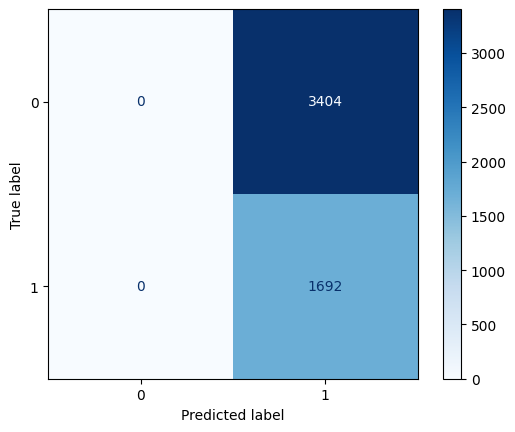

In [67]:
x_predict=model3.predict(X_test)
decision_tree_post_perf_test = evaluate_model(y_test, x_predict,model3)
decision_tree_post_perf_test

**Observations :** Here the model is having good recall for both training and testing data but low f1 score which indicates that there is no balance between recall and precision 

### Random Forest

In [68]:
model4 = RandomForestClassifier(random_state=1)
model4.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
Metrics,1.0,1.0,1.0,1.0


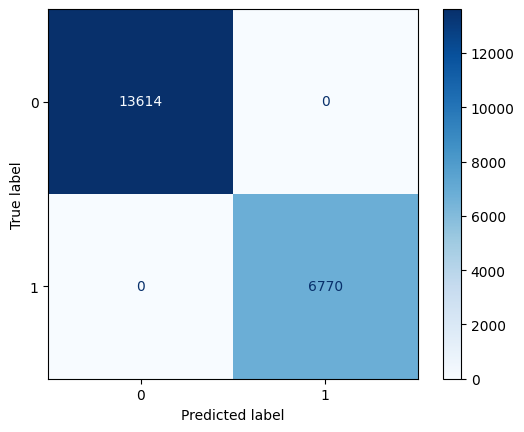

In [69]:
x_predict=model4.predict(X_train)
RF_train_perf=evaluate_model(y_train, x_predict,model4)
RF_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.720369,0.476359,0.599257,0.530787


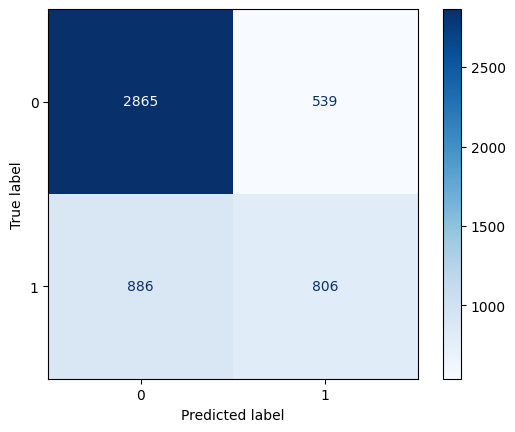

In [70]:
x_predict=model4.predict(X_test)
RF_test_perf=evaluate_model(y_test, x_predict,model4)
RF_test_perf

**Observations :** The random forest model is overfitting to the training data

### Hyperparameter Tuning

In [71]:
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=1, oob_score=True, bootstrap=True)

parameters = {
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 10],
    'n_estimators': [50, 100]  
}

from sklearn import metrics
scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=2)  
grid_obj = grid_obj.fit(X_train, y_train)  

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, oob_score=True, random_state=1)

,Accuracy,Recall,Precision,F1
Metrics,0.754072,0.676071,0.618764,0.64615


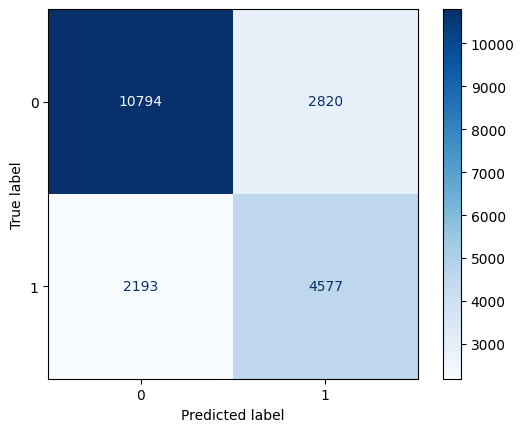

In [72]:
x_predict=rf_tuned.predict(X_train)
RF_tuned_train_perf=evaluate_model(y_train, x_predict,rf_tuned)
RF_tuned_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.726845,0.630024,0.581878,0.604994


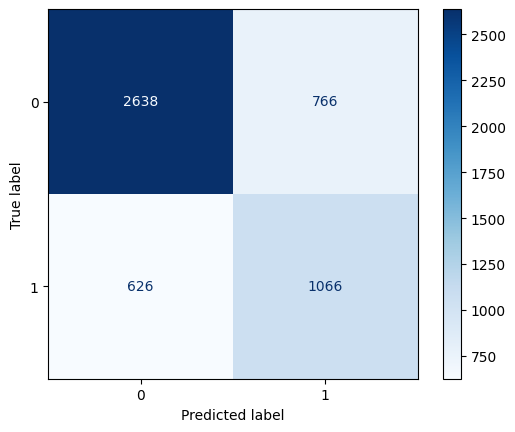

In [73]:
x_predict=rf_tuned.predict(X_test)
RF_tuned_test_perf=evaluate_model(y_test, x_predict,rf_tuned)
RF_tuned_test_perf

**Observations :** The model is performing well for training and testing data and as well here the recall is also good for both training and testing which means it indicates that the model is good at capturing the true positives

### Bagging classifier

,Accuracy,Recall,Precision,F1
Metrics,0.97866,0.94195,0.993457,0.967018


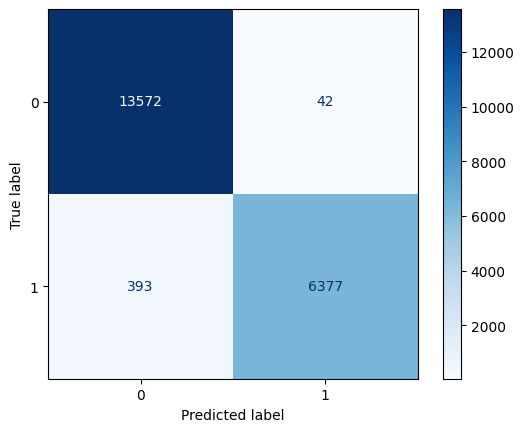

In [74]:
model5 = BaggingClassifier(random_state=1)
model5.fit(X_train,y_train)

x_predict=model5.predict(X_train)
bagging_train_perf=evaluate_model(y_train, x_predict,model5)
bagging_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.705848,0.417258,0.579163,0.485057


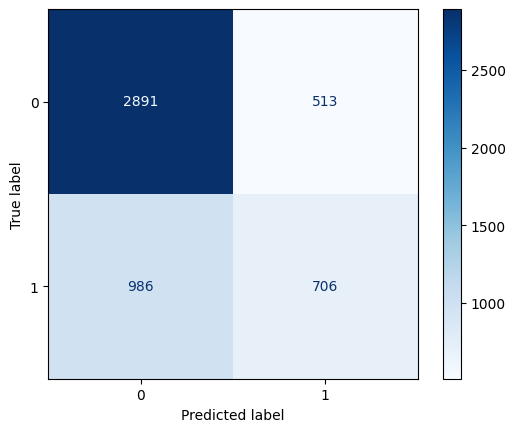

In [75]:
x_predict=model5.predict(X_test)
bagging_test_perf=evaluate_model(y_test, x_predict,model5)
bagging_test_perf

**Observations :** The bagging classifier is overfitting to the training data

### Bagging classifier tuning

In [76]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [10,30,50],
             }

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=50,
                  random_state=1)

,Accuracy,Recall,Precision,F1
Metrics,0.997007,0.991581,0.999404,0.995477


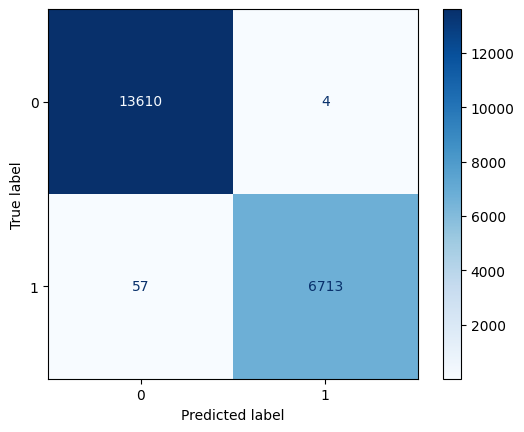

In [78]:
x_predict = bagging_estimator_tuned.predict(X_train)
bagging_estimator_tuned_model_train_perf = evaluate_model(y_train, x_predict,bagging_estimator_tuned)
bagging_estimator_tuned_model_train_perf

**Observations :** The performance is increased for hyperparameter tuning but the model is overfitting to the training data

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

,Accuracy,Recall,Precision,F1
Metrics,0.7396,0.444461,0.660448,0.531344


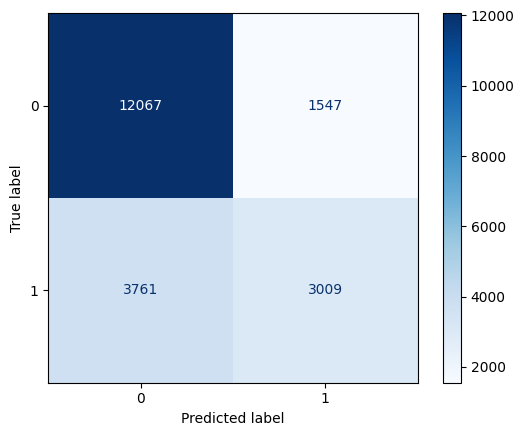

In [87]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

x_predict=ab_classifier.predict(X_train)
ab_train_perf=evaluate_model(y_train, x_predict,ab_classifier)
ab_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.734301,0.434988,0.64903,0.520878


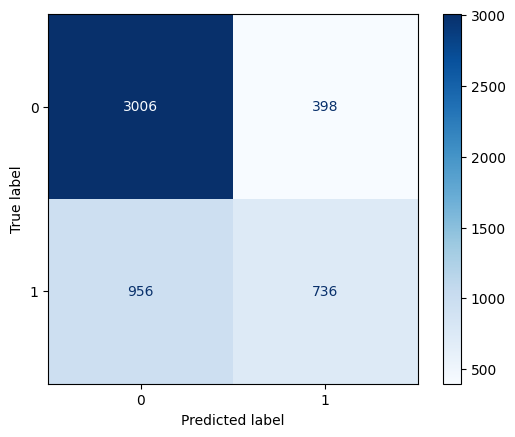

In [88]:
x_predict=ab_classifier.predict(X_test)
ab_test_perf=evaluate_model(y_test, x_predict,ab_classifier)
ab_test_perf

**Observations :** Here the model is performing well for both training and testing data but its focusing more on false positives(precision) and low f1 score which indicates there is no balance between the recall and precision

### Hyperparameter tuning

In [89]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators":  [10,30,50],
    "learning_rate":np.arange(0.1,1,0.1)
}

scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=np.float64(0.6), random_state=1)

,Accuracy,Recall,Precision,F1
Metrics,0.747204,0.525997,0.646866,0.580204


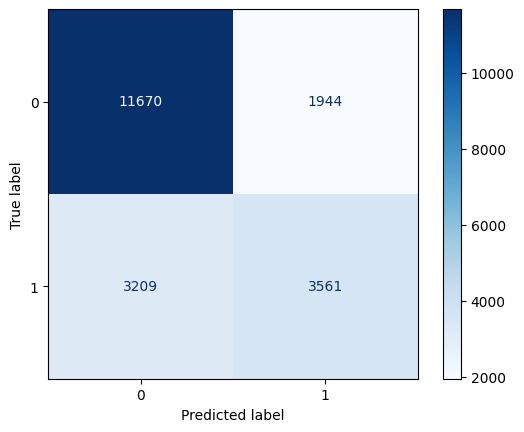

In [97]:
x_predict=abc_tuned.predict(X_train)
ab_tuned_train_perf=evaluate_model(y_train, x_predict,abc_tuned)
ab_tuned_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.737441,0.519504,0.626068,0.567829


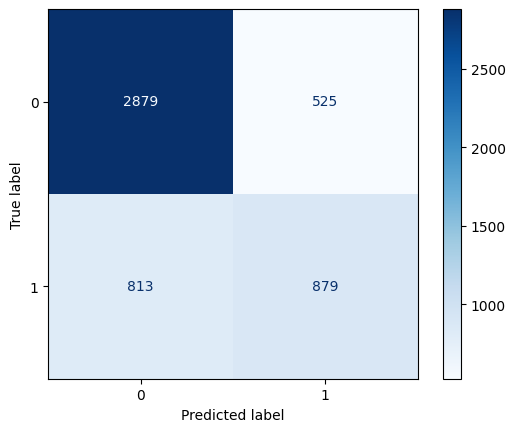

In [98]:
x_predict=abc_tuned.predict(X_test)
ab_tuned_test_perf=evaluate_model(y_test, x_predict,abc_tuned)
ab_tuned_test_perf

**Observations :** Here the model is performing well for both training and testing data but its focusing more on false positives(precision) and low f1 score which indicates there is no balance between the recall and precision

### Gradient Boosting Classifier

,Accuracy,Recall,Precision,F1
Metrics,0.757653,0.520384,0.675422,0.587852


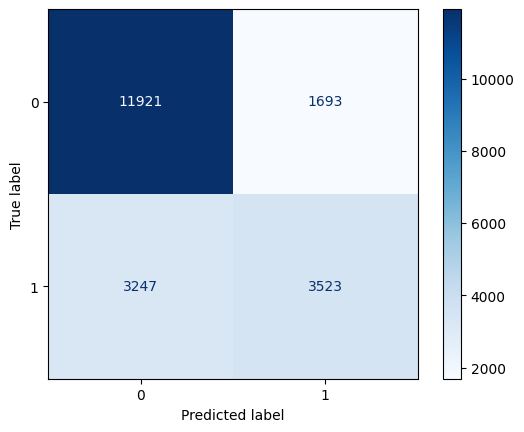

In [99]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

x_predict=gb_classifier.predict(X_train)
gb_classifier_model_train_perf=evaluate_model(y_train, x_predict,gb_classifier)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.746075,0.501773,0.653077,0.567513


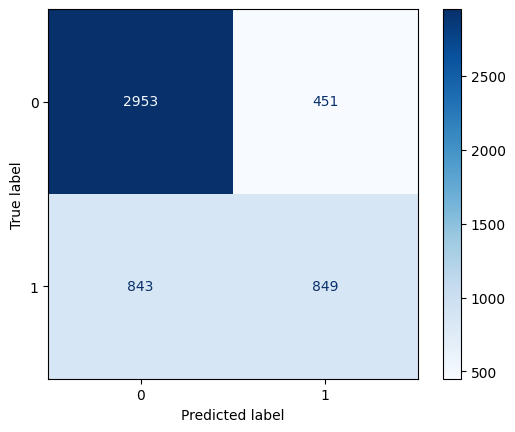

In [100]:
x_predict=gb_classifier.predict(X_test)
gb_classifier_model_test_perf=evaluate_model(y_test, x_predict,gb_classifier)
gb_classifier_model_test_perf

**Observations :** Here the model is having more precision than recall which means the model is focusing more on reducing the false positives instead of capturing the true positives

### Hyperparameter tuning

In [94]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

,Accuracy,Recall,Precision,F1
Metrics,0.756328,0.506352,0.678409,0.579887


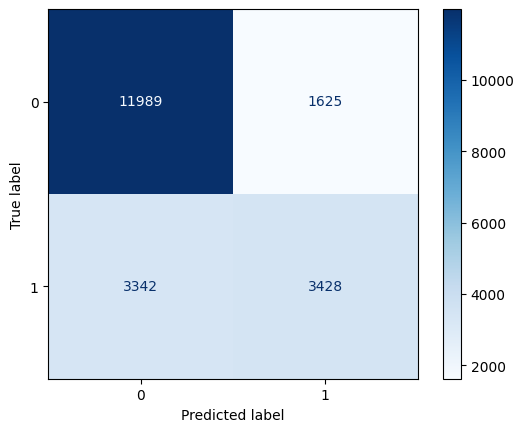

In [95]:
x_predict=gbc_tuned.predict(X_train)
gbc_tuned_model_train_perf=evaluate_model(y_train, x_predict,gbc_tuned)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
Metrics,0.744898,0.491135,0.654331,0.561107


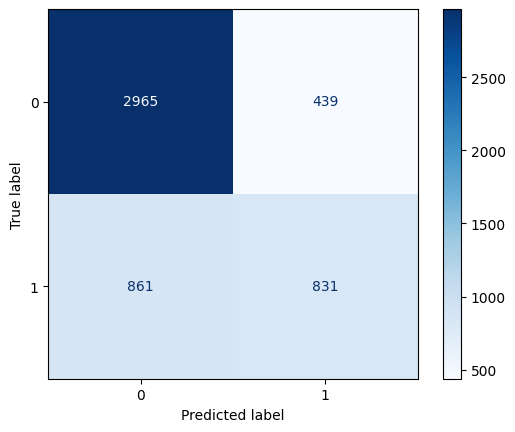

In [96]:
x_predict=gbc_tuned.predict(X_test)
gbc_tuned_model_test_perf=evaluate_model(y_test, x_predict,gbc_tuned)
gbc_tuned_model_test_perf

**Observations :** Here the model is performing well for both training and testing data but its focusing more on false positives(precision) and low f1 score which indicates there is no balance between the recall and precision

## Comparing all models

In [103]:
#training performance comparision

models_train_comp_df = pd.concat(
    [DT_default_train_perf.T,DT_class_train_perf.T,DT_Pre_train_perf.T,decision_tree_post_perf_train.T,RF_train_perf.T
     ,RF_tuned_train_perf.T,bagging_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_train_perf.T,ab_tuned_train_perf.T,
     gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T],axis=1)


models_train_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree class_weights",
    "Decision Tree pre_pruning",
    "Decision Tree post_pruning",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree default,Decision Tree class_weights,Decision Tree pre_pruning,Decision Tree post_pruning,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,1.0,1.0,0.644035,0.332123,1.0,0.754072,0.978660,0.997007,0.739600,0.747204,0.757653,0.756328
Recall,1.0,1.0,0.712766,1.000000,1.0,0.676071,0.941950,0.991581,0.444461,0.525997,0.520384,0.506352
Precision,1.0,1.0,0.475927,0.332123,1.0,0.618764,0.993457,0.999404,0.660448,0.646866,0.675422,0.678409
F1,1.0,1.0,0.570752,0.498637,1.0,0.646150,0.967018,0.995477,0.531344,0.580204,0.587852,0.579887


In [107]:
# testing performance comparision

models_test_comp_df = pd.concat(
    [DT_default_test_perf.T,DT_class_test_perf.T,DT_Pre_test_perf.T,decision_tree_post_perf_test.T,RF_test_perf
     .T,RF_tuned_test_perf.T,bagging_test_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_test_perf.T,ab_tuned_test_perf.T,
     gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T],axis=1)


In [108]:
models_test_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree class_weights",
    "Decision Tree pre_pruning",
    "Decision Tree post_pruning",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree default,Decision Tree class_weights,Decision Tree pre_pruning,Decision Tree post_pruning,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,1.0,0.649922,0.644035,0.332025,0.720369,0.726845,0.705848,0.997007,0.734301,0.737441,0.746075,0.744898
Recall,1.0,0.464539,0.712766,1.000000,0.476359,0.630024,0.417258,0.991581,0.434988,0.519504,0.501773,0.491135
Precision,1.0,0.472356,0.475927,0.332025,0.599257,0.581878,0.579163,0.999404,0.649030,0.626068,0.653077,0.654331
F1,1.0,0.468415,0.570752,0.498527,0.530787,0.604994,0.485057,0.995477,0.520878,0.567829,0.567513,0.561107


* Most models exhibit higher F1-scores on the training data which indicates overfitting.
* Bagging Classifier has the highest F1-score on the test data but also shows significant overfitting
* Tuned Random Forest Shows a better balance between training and test performance which suggests better generalization.
* AdaBoost and Gradient Boosting show some overfitting but generally perform better than the Bagging Classifier.

## Conclusions and Recommendations

1. The manual review process struggles to keep up with the rising number of applications, leading to inefficiencies and potential delays
2. Delays in processing visa applications can hinder the ability of businesses to fill critical roles, impacting overall economic productivity.
3. Allocate more funding and staff to handle the growing volume of applications efficiently.
4. Educate employers on compliance requirements and best practices to reduce errors and delays in visa applications.
5. Pair visa programs with initiatives to upskill the local workforce, reducing overdependence on foreign labor in the long term